<a href="https://colab.research.google.com/gist/keyurparalkar/5a49f696ed36ddce6526ab50e29e04ce/audio-data-augmentation-visualization-librosa-intgration-part-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import * 
from fastai.vision import *
import pathlib
import os
from scipy import signal
from scipy.io import wavfile
from fastprogress import progress_bar
import librosa
import librosa.display
import IPython.display as ipd

In [2]:
!git clone https://github.com/Jakobovski/free-spoken-digit-dataset.git

Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 3166 (delta 3), reused 5 (delta 0), pack-reused 3157
Receiving objects: 100% (3166/3166), 23.92 MiB | 7.65 MiB/s, done.
Resolving deltas: 100% (72/72), done.


In [0]:
data_path = pathlib.Path('./free-spoken-digit-dataset/recordings/')

In [12]:
data_path.ls()[:11]

[PosixPath('free-spoken-digit-dataset/recordings/9_theo_0.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/3_theo_17.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/3_jackson_4.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/2_yweweler_32.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/1_yweweler_23.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/1_yweweler_15.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/3_nicolas_18.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/6_nicolas_38.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/9_nicolas_25.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/0_theo_16.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/5_jackson_48.wav')]

# Audio Data Augmentation

In [0]:
def plot_spec(data:np.array,sr:int,title:str, fpath:str) -> None:
  label = str(fpath).split('/')[-1].split('_')[0]
  fig, ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].title.set_text(f'{title} / Label: {label}')
  ax[0].specgram(data,Fs=2)
  fig.savefig('temp1.png',bbox_inches="tight",pad_inches=0)
  ax[1].set_ylabel('Amplitude')
  ax[1].plot(np.linspace(0,1,len(data)), data)

In [0]:
file_path = data_path.ls()[10]
wav, sr = librosa.load(file_path,sr=None)
librosa.output.write_wav('./orig',wav,sr)

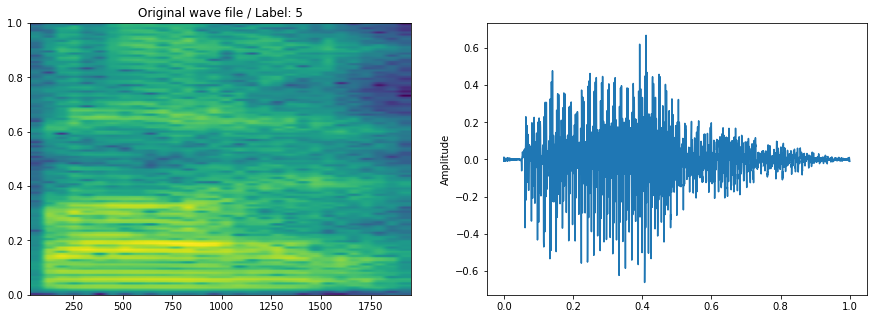

In [15]:
plot_spec(wav,sr,'Original wave file',file_path)
ipd.Audio(data=wav,rate=sr)

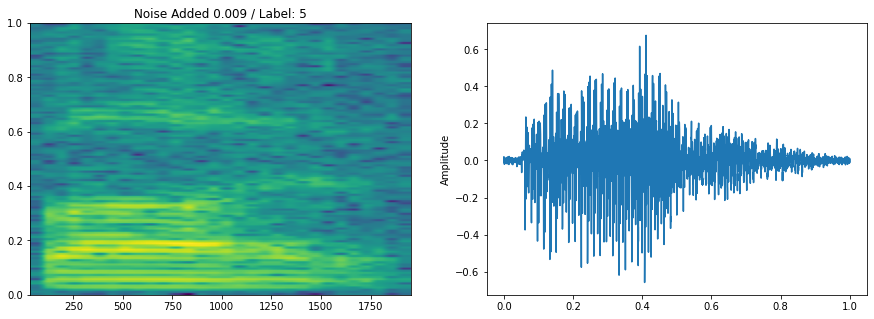

In [27]:
'''
Noise addition using normal distribution with mean = 0 and std =1

Permissible noise factor value = x > 0.004
'''
wav_n = wav + 0.009*np.random.normal(0,1,len(wav))
plot_spec(wav_n,sr,'Noise Added 0.009',file_path)
ipd.Audio(data=wav_n,rate=sr)
# librosa.output.write_wav('./noise_add.wav',wav_n,sr)

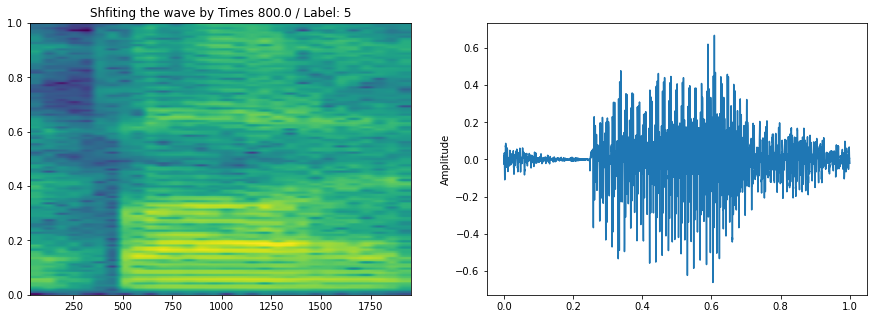

In [24]:
#Shifting the sound wave
'''
Permissible factor values = sr/10
'''

wav_roll = np.roll(wav,int(sr/10))
plot_spec(data=wav_roll,sr=sr,title=f'Shfiting the wave by Times {sr/10}',fpath=file_path)
ipd.Audio(wav_roll,rate=sr)
# librosa.output.write_wav('./roll.wav',wav_roll,sr)

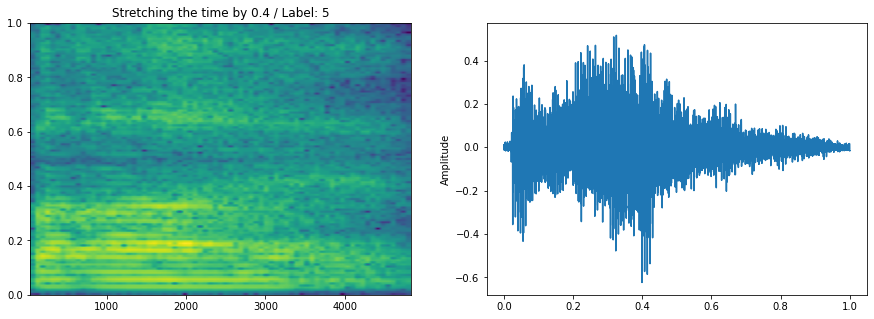

In [25]:
#Time-stretching the wave
'''
Permissible factor values = 0 < x < 1.0
'''

factor = 0.4
wav_time_stch = librosa.effects.time_stretch(wav,factor)
plot_spec(data=wav_time_stch,sr=sr,title=f'Stretching the time by {factor}',fpath=file_path)
ipd.Audio(wav_time_stch,rate=sr)
# librosa.output.write_wav('./time_stech.wav',wav_time_stch,sr)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


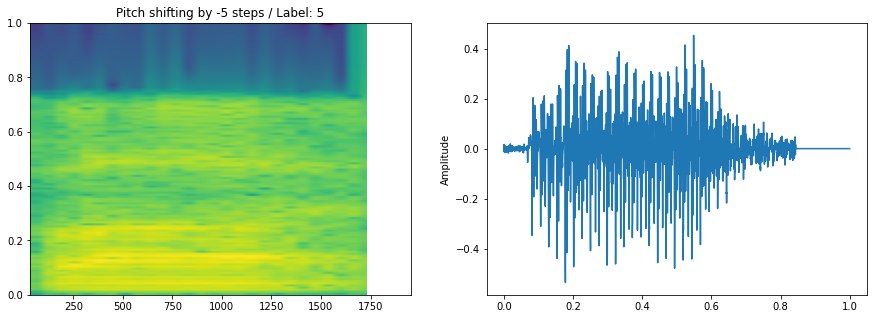

In [26]:
#pitch shifting of wav
'''
Permissible factor values = -5 <= x <= 5
'''
wav_pitch_sf = librosa.effects.pitch_shift(wav,sr,n_steps=-5)
plot_spec(data=wav_pitch_sf,sr=sr,title=f'Pitch shifting by {-5} steps',fpath=file_path)
ipd.Audio(wav_pitch_sf,rate=sr)
# librosa.output.write_wav('./pitch_shift.wav',wav_pitch_sf,sr)

In [0]:
sr/10

800.0